In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('data.csv')

In [7]:
df2017=df[df['Date'].str.startswith('2017')]
df2017=df2017[df2017['Region'].str.contains('global')]

1

In [8]:
df2017=df2017.sort_values('Streams',ascending=False)
print(df2017.head(10))

         Position                          Track Name      Artist   Streams  \
3145443         1  Despacito (Featuring Daddy Yankee)  Luis Fonsi  11381520   
3128643         1                        Shape of You  Ed Sheeran   9891056   
3145643         1  Despacito (Featuring Daddy Yankee)  Luis Fonsi   9849173   
3128843         1                        Shape of You  Ed Sheeran   9603434   
3129243         1                        Shape of You  Ed Sheeran   8900049   
3129843         1                        Shape of You  Ed Sheeran   8849461   
3129443         1                        Shape of You  Ed Sheeran   8738426   
3129643         1                        Shape of You  Ed Sheeran   8695555   
3130043         1                        Shape of You  Ed Sheeran   8664792   
3145243         1                   Despacito - Remix  Luis Fonsi   8525474   

                                                       URL        Date  Region  
3145443  https://open.spotify.com/track/4aWmUDTfI

2

In [9]:
df2 = df[['Artist', 'Streams']]
df2 = df2.groupby(['Artist'])
df2 = df2.sum()
df2=df2.sort_values('Streams',ascending=False)
print(df2.head(10))

                     Streams
Artist                      
Ed Sheeran        8913973976
Drake             4523630992
The Chainsmokers  4292590087
Post Malone       3700404149
Kendrick Lamar    3570665303
Luis Fonsi        3555514919
J Balvin          2494735971
Calvin Harris     2397708371
Imagine Dragons   2322921399
DJ Khaled         2236224259


3

In [10]:
import json
f=open('countries.json',encoding='utf8')
lines=f.readlines()
s=' '.join(lines)
d=json.loads(s)
def continent_map(country):
    country=country.upper()
    if country in d:
        return d[country]['continent']
    else:
        return 'GLOBAL'
df201712=df[df['Date'].str.startswith('2017-12')]
df201712['continent']=df201712['Region'].map(continent_map)
df201712=df201712.groupby(['continent'])
for i in df201712:
    print(df201712.head(10))


         Position                                         Track Name  \
66200           1                                    Échame La Culpa   
66201           2                                           Criminal   
66202           3            Déjala Que Vuelva (feat. Manuel Turizo)   
66203           4                                        Sensualidad   
66204           5                                            Mayores   
66205           6                                            Corazón   
66206           7                                         Se Preparó   
66207           8                                    Robarte un Beso   
66208           9                                    Suena El Dembow   
66209          10                                             Que Va   
140400          1                                                113   
140401          2                                       Drapeau noir   
140402          3                                             Ri

/var/folders/jt/pwm0h7q178lbtpm53105byxw0000gn/T/ipykernel_15323/136103147.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df201712['continent']=df201712['Region'].map(continent_map)


4

<AxesSubplot:>

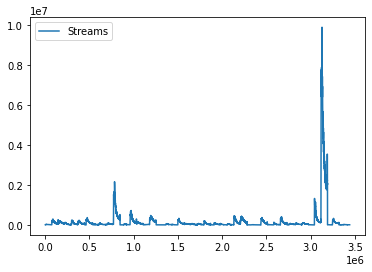

In [11]:
shape_of_you=df[df['Track Name']=='Shape of You']
shape_of_you=shape_of_you[['Date','Streams']]
shape_of_you.plot()